# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
    
%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [18]:
sinasc_df = pd.read_csv("G:\\Downloads\\M5E1\\M5E1\\Tarefa1\\SINASC_RO_2019.csv")
sinasc_df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [20]:
# Criar faixas de Latitude
sinasc_raw['FaixaLat'] = pd.cut(sinasc_raw['munResLat'], bins=[-np.inf, -10.5, np.inf], labels=['Below -10.5', 'Above -10.5'])

# Aplicar groupby e realizar iperações estatísticas
grouped_lat = sinasc_raw.groupby('FaixaLat').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
print("Tarefa 1:")
print(grouped_lat)

Tarefa 1:
            IDADEMAE                                                 \
                 sum       mean min max median       std        var   
FaixaLat                                                              
Below -10.5   340143  26.178943  12  53   26.0  6.320385  39.947272   
Above -10.5   365094  26.014964  11  52   25.0  6.447663  41.572355   

            QTDFILVIVO                                                  
                   sum      mean  min   max median       std       var  
FaixaLat                                                                
Below -10.5    12600.0  0.980011  0.0  30.0    1.0  1.138300  1.295727  
Above -10.5    14226.0  1.129317  0.0  12.0    1.0  1.198613  1.436674  


C:\Users\suporte\AppData\Local\Temp\ipykernel_4420\905804764.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_lat = sinasc_raw.groupby('FaixaLat').agg({


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [22]:
# Criar faixas de Área
sinasc_raw['FaixaArea'] = pd.cut(sinasc_raw['munResArea'], bins=[-np.inf, 3000, np.inf], labels=['Below 3000', 'Above 3000'])

# Aplicar groupby e realizar operações estqtísticas
grouped_area = sinasc_raw.groupby('FaixaArea').agg({
    'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
print("\nTarefa 2:")
print(grouped_area)


Tarefa 2:
           IDADEMAE                                                QTDFILVIVO  \
                sum       mean min max median       std        var        sum   
FaixaArea                                                                       
Below 3000   137389  26.324775  11  53   26.0  6.305535  39.759775     4773.0   
Above 3000   567848  26.038518  12  53   25.0  6.405497  41.030387    22053.0   

                                                            
                mean  min   max median       std       var  
FaixaArea                                                   
Below 3000  0.924284  0.0  30.0    1.0  1.075442  1.156575  
Above 3000  1.086890  0.0  14.0    1.0  1.191750  1.420268  


C:\Users\suporte\AppData\Local\Temp\ipykernel_4420\842083037.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_area = sinasc_raw.groupby('FaixaArea').agg({


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [24]:
# Determinar faixas de Altitude usando quartis
quartis_alt = sinasc_raw['munResAlt'].quantile([0, 0.25, 0.5, 0.75, 1])
labels_alt = ['Q1', 'Q2', 'Q3', 'Q4']
sinasc_raw['FaixaAlt'] = pd.qcut(sinasc_raw['munResAlt'], q=4, labels=labels_alt)

# Aplicar groupby e realizar operações estatísticas
grouped_alt = sinasc_raw.groupby('FaixaAlt').agg({
    'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
    'APGAR1': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})
print("\nTarefa 3:")
print(grouped_alt)


Tarefa 3:
              PESO                                                             \
               sum         mean  min   max  median         std            var   
FaixaAlt                                                                        
Q1        28470528  3244.874402  295  5135  3280.0  578.354523  334493.954131   
Q2        15758876  3250.593234  345  5070  3280.0  524.789502  275404.021840   
Q3        22577526  3254.183626  292  5480  3270.0  517.418477  267721.880360   
Q4        20846812  3223.567651  258  5985  3260.0  540.681361  292336.334543   

           APGAR1                                                  
              sum      mean  min   max median       std       var  
FaixaAlt                                                           
Q1        72098.0  8.270965  0.0  10.0    8.0  0.936486  0.877006  
Q2        39053.0  8.088857  0.0  10.0    8.0  1.127916  1.272194  
Q3        55562.0  8.010669  0.0  10.0    8.0  0.935960  0.876022  
Q4        524

C:\Users\suporte\AppData\Local\Temp\ipykernel_4420\2444132126.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_alt = sinasc_raw.groupby('FaixaAlt').agg({


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


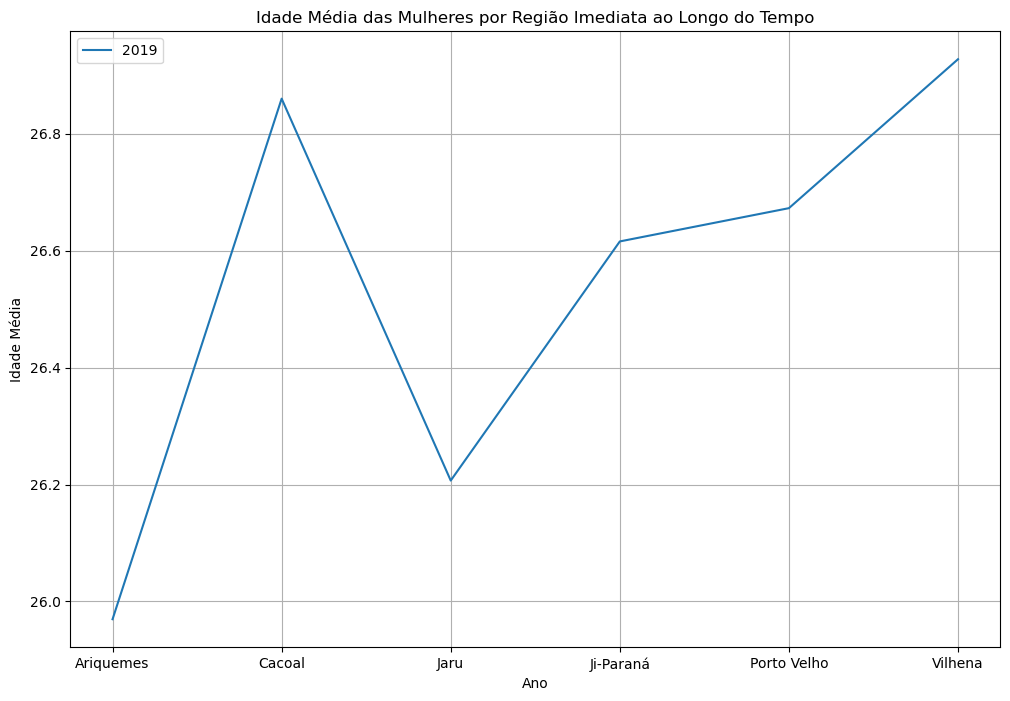

In [68]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}


# Adicionando coluna de região imediata
sinasc_raw['RegiaoImediata'] = sinasc_raw['munResNome'].map(imediatas)

# Converter a data de nascimento para o formato correto
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'], format='%d%m%Y', errors='coerce')

# Calcular a idade das mães
sinasc_raw['IdadeMae'] = 2019 - pd.to_datetime(sinasc_raw['DTNASCMAE'], format='%d%m%Y', errors='coerce').dt.year

# Calcular a idade média das mulheres por região imediats ao longo do tempo
idade_media_regiao = sinasc_raw.groupby(['RegiaoImediata', sinasc_raw['DTNASC'].dt.year])['IdadeMae'].mean().unstack()

# Gráfico
plt.figure(figsize=(12, 8))
for regiao in idade_media_regiao.columns:
    plt.plot(idade_media_regiao.index, idade_media_regiao[regiao], label=regiao)

plt.title('Idade Média das Mulheres por Região Imediata ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Idade Média')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


In [28]:
#dados_ro = pd.read_csv(r'G:\Downloads\M5E1\M5E1\Tarefa1\dados_extras_ro.csv', encoding='latin-1')

dados_ro = pd.read_csv(r'G:\Downloads\M5E1\M5E1\Tarefa1\dados_extras_ro.csv', encoding='latin-1', delimiter=';')

print(dados_ro.head())
print(dados_ro.columns)

                 municipio     regiao    idh    ifdm      pib
0    Alta Floresta D'Oeste     Cacoal  0.641  0.6337   496000
1  Alto Alegre dos Parecis     Cacoal  0.592  0.5046   213410
2             Alto Paraíso  Ariquemes  0.625  0.5735   358000
3         Alvorada D'Oeste  Ji-Paraná  0.643  0.5919   204098
4                Ariquemes  Ariquemes  0.702  0.7746  2579830
Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')


In [34]:
# Converter todas as colunas para valores numéricos
dados_ro = dados_ro.apply(pd.to_numeric, errors='coerce')

# Verificar os tipos de dados das colunas após a conversão
print(dados_ro.dtypes)

municipio    float64
regiao       float64
idh          float64
ifdm         float64
pib            int64
dtype: object


### Afim de facilitar a leitura e o entendimento do código, irei construir a lógico do código primeiro e depois, apenas exibo os resultados em cada etapa da atividade. ###

Primeiro irei definir as faixas de cada variável.

In [36]:
# IDH
faixas_idh = {
    'IDH muito alto': (0.800, 1.000),
    'IDH alto': (0.700, 0.799),
    'IDH médio': (0.600, 0.699),
    'IDH baixo': (0.500, 0.599),
    'IDH muito baixo': (0.000, 0.499)
}

# IFDM
faixas_ifdm = {
    'Alto': (0.8, float('inf')),
    'Moderado': (0.6, 0.8),
    'Regular': (0.4, 0.6),
    'Baixo': (-float('inf'), 0.4)
}

# PIB
faixas_pib = {
    'Acima de 1 Bilhão': (1e9, float('inf')),
    'Acima de 500 Milhões': (5e8, 1e9),
    'Acima de 300 Milhões': (3e8, 5e8),
    'Acima de 200 Milhões': (2e8, 3e8),
    'Acima de 100 Milhões': (1e8, 2e8),
    'Até 100 Milhões': (0, 1e8)
}


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [42]:

# Lendo o arquivo CSV
dados_ro = pd.read_csv(r'G:\Downloads\M5E1\M5E1\Tarefa1\dados_extras_ro.csv', encoding='latin-1', delimiter=';')

# Imprimindo as primeiras linhas do DataFrame e suas colunas
print(dados_ro.head())
print(dados_ro.columns)

# Criando um dicionário de mapeamento de 'municipio' para 'regiao'
regioes_map = dict(zip(dados_ro['municipio'], dados_ro['regiao']))


# Mantendo uma cópia das colunas 'municipio' e 'regiao'
municipios = dados_ro['municipio'].copy()
regioes = dados_ro['regiao'].copy()


# Convertendo todas as colunas para valores numéricos onde possível
dados_ro = dados_ro.apply(pd.to_numeric, errors='coerce')

# Restaurando as colunas 'municipio' e 'regiao'
dados_ro['municipio'] = municipios
dados_ro['regiao'] = regioes


# Verificando os tipos de dados das colunas após a conversão
print(dados_ro.dtypes)

# Definindo as faixas para cada variável
faixas_idh = {
    'IDH muito alto': (0.800, 1.000),
    'IDH alto': (0.700, 0.799),
    'IDH médio': (0.600, 0.699),
    'IDH baixo': (0.500, 0.599),
    'IDH muito baixo': (0.000, 0.499)
}

faixas_ifdm = {
    'Alto': (0.8, float('inf')),
    'Moderado': (0.6, 0.8),
    'Regular': (0.4, 0.6),
    'Baixo': (-float('inf'), 0.4)
}

faixas_pib = {
    'Acima de 1 Bilhão': (1e9, float('inf')),
    'Acima de 500 Milhões': (5e8, 1e9),
    'Acima de 300 Milhões': (3e8, 5e8),
    'Acima de 200 Milhões': (2e8, 3e8),
    'Acima de 100 Milhões': (1e8, 2e8),
    'Até 100 Milhões': (0, 1e8)
}

# Função para classificar valores nas faixas definidas
def classificar_faixas(valor, faixas):
    for faixa, (limite_inferior, limite_superior) in faixas.items():
        if limite_inferior <= valor <= limite_superior:
            return faixa
    return None

# Aplicando a classificação para as colunas IDH, IFDM e PIB
dados_ro['Faixa_IDH'] = dados_ro['idh'].apply(lambda x: classificar_faixas(x, faixas_idh))
dados_ro['Faixa_IFDM'] = dados_ro['ifdm'].apply(lambda x: classificar_faixas(x, faixas_ifdm))
dados_ro['Faixa_PIB'] = dados_ro['pib'].apply(lambda x: classificar_faixas(x, faixas_pib))

# Mostrando as primeiras linhas do DataFrame com as novas colunas de classificação
print(dados_ro.head())

                 municipio     regiao    idh    ifdm      pib
0    Alta Floresta D'Oeste     Cacoal  0.641  0.6337   496000
1  Alto Alegre dos Parecis     Cacoal  0.592  0.5046   213410
2             Alto Paraíso  Ariquemes  0.625  0.5735   358000
3         Alvorada D'Oeste  Ji-Paraná  0.643  0.5919   204098
4                Ariquemes  Ariquemes  0.702  0.7746  2579830
Index(['municipio', 'regiao', 'idh', 'ifdm', 'pib'], dtype='object')
municipio     object
regiao        object
idh          float64
ifdm         float64
pib            int64
dtype: object
                 municipio     regiao    idh    ifdm      pib  Faixa_IDH  \
0    Alta Floresta D'Oeste     Cacoal  0.641  0.6337   496000  IDH médio   
1  Alto Alegre dos Parecis     Cacoal  0.592  0.5046   213410  IDH baixo   
2             Alto Paraíso  Ariquemes  0.625  0.5735   358000  IDH médio   
3         Alvorada D'Oeste  Ji-Paraná  0.643  0.5919   204098  IDH médio   
4                Ariquemes  Ariquemes  0.702  0.7746  257983

### Agora irei clasificá-las:

In [38]:
def classificar_faixas(valor, faixas):
    for faixa, (limite_inferior, limite_superior) in faixas.items():
        if limite_inferior <= valor <= limite_superior:
            return faixa
    return None

# Aplicar a classificação para as colunas IDH, IFDM e PIB
dados_ro['Faixa_IDH'] = dados_ro['idh'].apply(lambda x: classificar_faixas(x, faixas_idh))
dados_ro['Faixa_IFDM'] = dados_ro['ifdm'].apply(lambda x: classificar_faixas(x, faixas_ifdm))
dados_ro['Faixa_PIB'] = dados_ro['pib'].apply(lambda x: classificar_faixas(x, faixas_pib))

# Mostrar as primeiras linhas do dataframe com as novas colunas de faixas
print(dados_ro.head())

   municipio  regiao    idh    ifdm      pib  Faixa_IDH Faixa_IFDM  \
0        NaN     NaN  0.641  0.6337   496000  IDH médio   Moderado   
1        NaN     NaN  0.592  0.5046   213410  IDH baixo    Regular   
2        NaN     NaN  0.625  0.5735   358000  IDH médio    Regular   
3        NaN     NaN  0.643  0.5919   204098  IDH médio    Regular   
4        NaN     NaN  0.702  0.7746  2579830   IDH alto   Moderado   

         Faixa_PIB  
0  Até 100 Milhões  
1  Até 100 Milhões  
2  Até 100 Milhões  
3  Até 100 Milhões  
4  Até 100 Milhões  


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

In [52]:
# Agrupar os dados pelas faixas de IDH, IFDM e PIB
agrupamento_idh = dados_ro.groupby('Faixa_IDH').size()
agrupamento_ifdm = dados_ro.groupby('Faixa_IFDM').size()
agrupamento_pib = dados_ro.groupby('Faixa_PIB').size()

# Mostrar os resultados dos agrupamentos
print("Agrupamento por Faixa IDH:")
print(agrupamento_idh)

print("\nAgrupamento por Faixa IFDM:")
print(agrupamento_ifdm)

print("\nAgrupamento por Faixa PIB:")
print(agrupamento_pib)

# Exemplo de análise e insight:
# Analisando o IDH
idh_muito_alto = dados_ro[dados_ro['Faixa_IDH'] == 'IDH muito alto']
idh_alto = dados_ro[dados_ro['Faixa_IDH'] == 'IDH alto']

# Encontrar a média do PIB para municípios com IDH muito alto e IDH alto
media_pib_idh_muito_alto = idh_muito_alto['pib'].mean()
media_pib_idh_alto = idh_alto['pib'].mean()

print(f"Média do PIB para municípios com IDH muito alto: {media_pib_idh_muito_alto}")
print(f"Média do PIB para municípios com IDH alto: {media_pib_idh_alto}")

Agrupamento por Faixa IDH:
Faixa_IDH
IDH alto      7
IDH baixo     9
IDH médio    36
dtype: int64

Agrupamento por Faixa IFDM:
Faixa_IFDM
Moderado    26
Regular     26
dtype: int64

Agrupamento por Faixa PIB:
Faixa_PIB
Até 100 Milhões    52
dtype: int64
Média do PIB para municípios com IDH muito alto: nan
Média do PIB para municípios com IDH alto: 4545286.0


Podemos notar que, no IFDM, todos os municípios estão em apenas duas categorias, moderado e regular, e que, ambos possuem o mesmo número de municípios em cada categoria. No caso do IDH, é notório a prevalência dp IDH médio nos municípios, sendo praticamente 70% de nossa base, dentro dessa categoria.